<a href="https://colab.research.google.com/github/BHRA2004/Sleep-Cycle-Productivity-Data-Analysis/blob/main/Sleep_Cycle%26Productivity_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style("whitegrid")

In [6]:
df = pd.read_csv("sleep_cycle_productivity.csv")
df.head()

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9


In [7]:
print("Dataset Information:")
df.info()

print("\n\nDataset Description:")
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           5000 non-null   object 
 1   Person_ID                      5000 non-null   int64  
 2   Age                            5000 non-null   int64  
 3   Gender                         5000 non-null   object 
 4   Sleep Start Time               5000 non-null   float64
 5   Sleep End Time                 5000 non-null   float64
 6   Total Sleep Hours              5000 non-null   float64
 7   Sleep Quality                  5000 non-null   int64  
 8   Exercise (mins/day)            5000 non-null   int64  
 9   Caffeine Intake (mg)           5000 non-null   int64  
 10  Screen Time Before Bed (mins)  5000 non-null   int64  
 11  Work Hours (hrs/day)           5000 non-null   float64
 12  Productivity Score         

,Person_ID,Age,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5527.152200,38.590600,22.005350,4.980262,6.974902,5.520800,43.962600,146.71140,91.421200,7.987873,5.644200,5.370600,5.548000
std,2595.391771,12.302799,1.157591,1.862508,1.454033,2.863845,25.798541,85.83139,52.079123,2.275734,2.872221,2.835783,2.888419
min,1000.000000,18.000000,20.000000,0.560000,4.500000,1.000000,0.000000,0.00000,0.000000,4.000067,1.000000,1.000000,1.000000
25%,3258.000000,28.000000,21.020000,3.660000,5.690000,3.000000,22.000000,73.00000,46.000000,6.032720,3.000000,3.000000,3.000000
50%,5603.000000,39.000000,22.020000,4.970000,6.960000,5.000000,44.000000,144.00000,92.000000,7.998295,6.000000,5.000000,6.000000
75%,7749.500000,49.000000,23.000000,6.310000,8.210000,8.000000,66.000000,220.00000,136.000000,9.905024,8.000000,8.000000,8.000000
max,9998.000000,59.000000,23.980000,9.420000,9.500000,10.000000,89.000000,299.00000,179.000000,11.999141,10.000000,10.000000,10.000000


In [8]:
print("Missing values per column:")
print(df.isnull().sum())

df.drop_duplicates(inplace=True)

Missing values per column:
Date                             0
Person_ID                        0
Age                              0
Gender                           0
Sleep Start Time                 0
Sleep End Time                   0
Total Sleep Hours                0
Sleep Quality                    0
Exercise (mins/day)              0
Caffeine Intake (mg)             0
Screen Time Before Bed (mins)    0
Work Hours (hrs/day)             0
Productivity Score               0
Mood Score                       0
Stress Level                     0
dtype: int64


In [9]:
print(df['Sleep Start Time'].head())
print(df['Sleep End Time'].head())

0    23.33
1    21.02
2    22.10
3    23.10
4    21.42
Name: Sleep Start Time, dtype: float64
0    4.61
1    2.43
2    3.45
3    6.65
4    4.17
Name: Sleep End Time, dtype: float64


In [10]:
def clean_time(time_value):
  time_str = str(time_value).strip()
  if ':' not in time_str:
    try:
      hour = int(float(time_str))
      time_str = f"{hour:02d}:00"
    except ValueError:
      pass
  return time_str

df['Sleep Start Time'] = df['Sleep Start Time'].apply(clean_time)
df['Sleep End Time'] = df['Sleep End Time'].apply(clean_time)

print(df['Sleep Start Time'].head())
print(df['Sleep End Time'].head())



0    23:00
1    21:00
2    22:00
3    23:00
4    21:00
Name: Sleep Start Time, dtype: object
0    04:00
1    02:00
2    03:00
3    06:00
4    04:00
Name: Sleep End Time, dtype: object


In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df['Sleep Start'] = pd.to_datetime(df['Date'].dt.strftime('%Y-%m-%d') + ' ' + df['Sleep Start Time'])
df['Sleep End'] = pd.to_datetime(df['Date'].dt.strftime('%Y-%m-%d') + ' ' + df['Sleep End Time'])

mask = df['Sleep End'] < df['Sleep Start']
df.loc[mask, 'Sleep End'] += pd.Timedelta(days=1)

df[['Date', 'Sleep Start Time', 'Sleep Start', 'Sleep End Time', 'Sleep End']].head()

,Date,Sleep Start Time,Sleep Start,Sleep End Time,Sleep End
0,2024-04-12,23:00,2024-04-12 23:00:00,04:00,2024-04-13 04:00:00
1,2024-11-04,21:00,2024-11-04 21:00:00,02:00,2024-11-05 02:00:00
2,2024-08-31,22:00,2024-08-31 22:00:00,03:00,2024-09-01 03:00:00
3,2024-02-22,23:00,2024-02-22 23:00:00,06:00,2024-02-23 06:00:00
4,2024-02-23,21:00,2024-02-23 21:00:00,04:00,2024-02-24 04:00:00


In [13]:
df['Age'] = df['Age'].astype(int)

**EDA**

Distribution of Total Sleep Hours and Sleep Quality

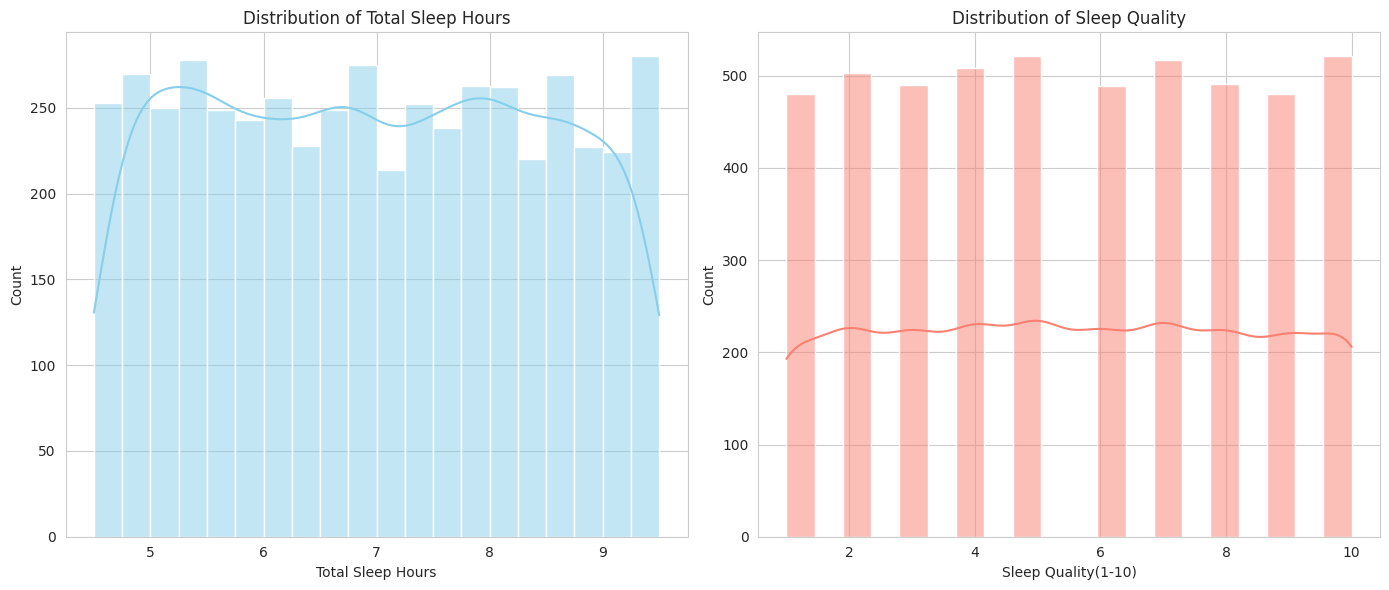

In [16]:
plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Total Sleep Hours'], bins=20, kde=True, color = 'skyblue')
plt.title('Distribution of Total Sleep Hours')
plt.xlabel('Total Sleep Hours')

plt.subplot(1, 2, 2)
sns.histplot(df['Sleep Quality'], bins=20, kde=True, color = 'salmon')
plt.title('Distribution of Sleep Quality')
plt.xlabel('Sleep Quality(1-10)')

plt.tight_layout()
plt.show()

Sleep Quality vs. Age

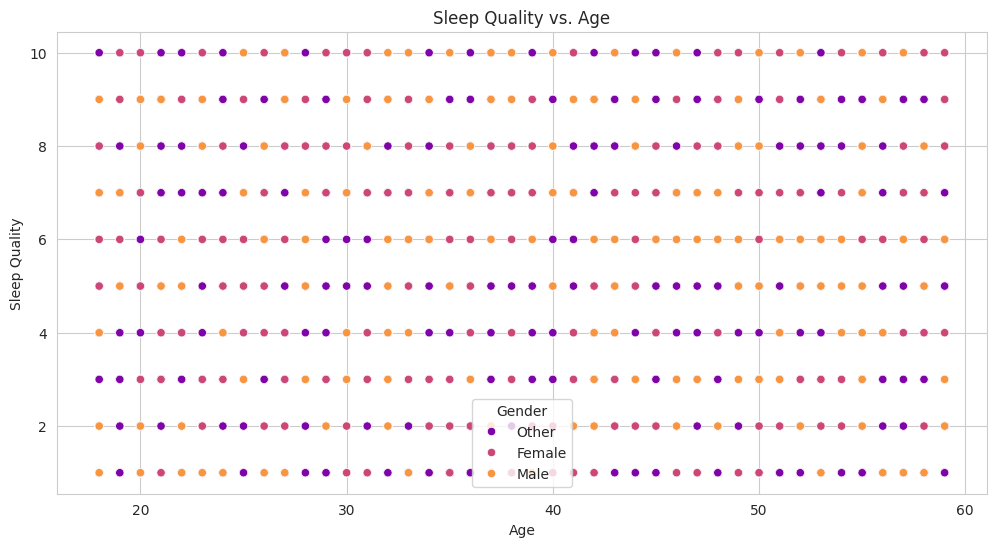

In [22]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Sleep Quality', data=df, hue = 'Gender', palette='plasma')
plt.title('Sleep Quality vs. Age')
plt.xlabel('Age')
plt.ylabel('Sleep Quality')
plt.show()

Sleep Quality by Gender

<ipython-input-23-f7cd546feac1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Sleep Quality', data=df, palette='Set2')


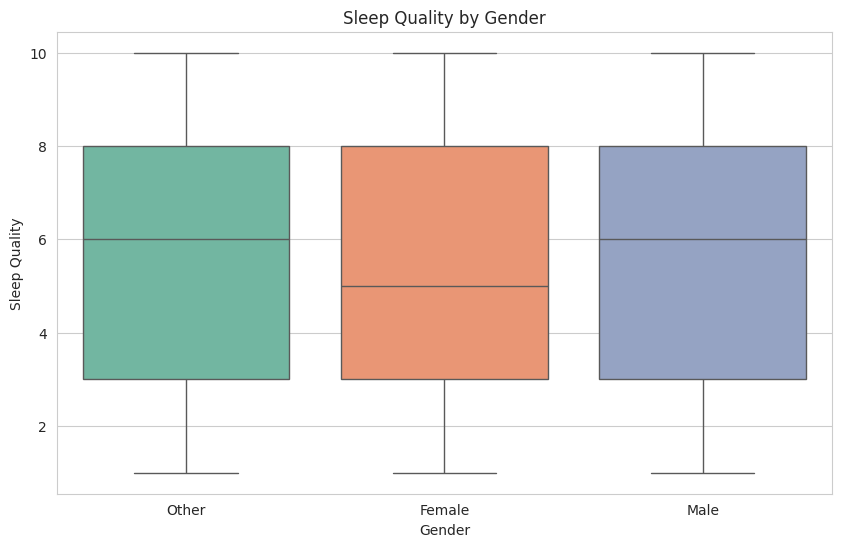

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Gender', y='Sleep Quality', data=df, palette='Set2')
plt.title('Sleep Quality by Gender')
plt.xlabel('Gender')
plt.ylabel('Sleep Quality')
plt.show()

Correlation Analysis

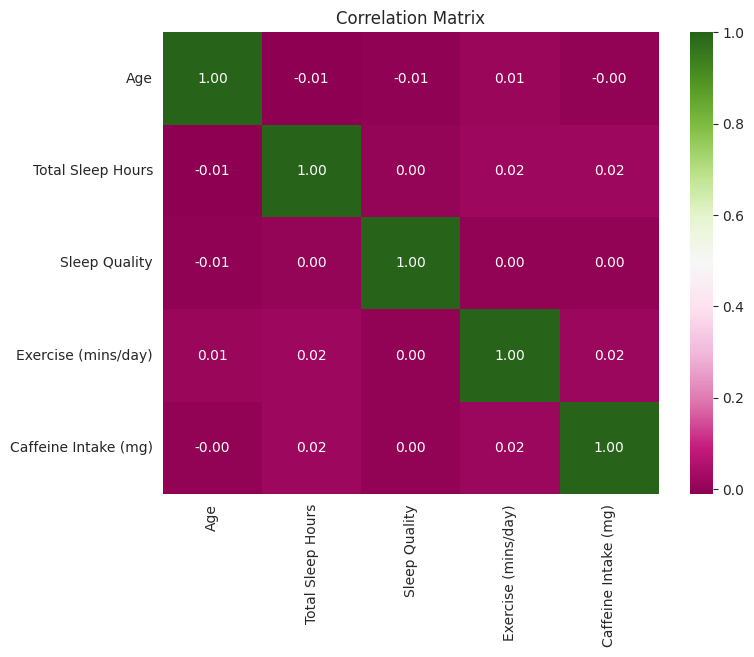

In [25]:
num_cols = ['Age', 'Total Sleep Hours', 'Sleep Quality', 'Exercise (mins/day)', 'Caffeine Intake (mg)']
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='PiYG', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Exercise & Caffine vs. Sleep Quality

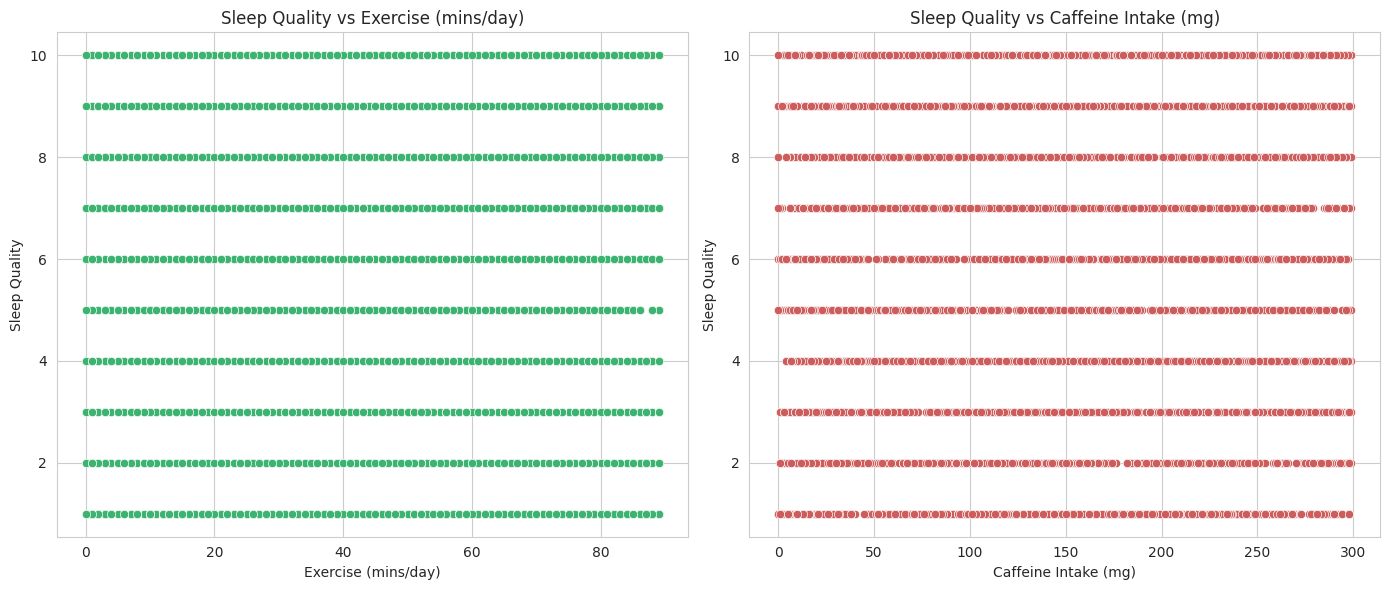

In [26]:
plt.figure(figsize=(14,6))

# Exercise vs. Sleep Quality
plt.subplot(1,2,1)
sns.scatterplot(data=df, x='Exercise (mins/day)', y='Sleep Quality', color='mediumseagreen')
plt.title('Sleep Quality vs Exercise (mins/day)')
plt.xlabel('Exercise (mins/day)')

# Caffeine Intake vs. Sleep Quality
plt.subplot(1,2,2)
sns.scatterplot(data=df, x='Caffeine Intake (mg)', y='Sleep Quality', color='indianred')
plt.title('Sleep Quality vs Caffeine Intake (mg)')
plt.xlabel('Caffeine Intake (mg)')

plt.tight_layout()
plt.show()

Sleep Start and Sleep End Times

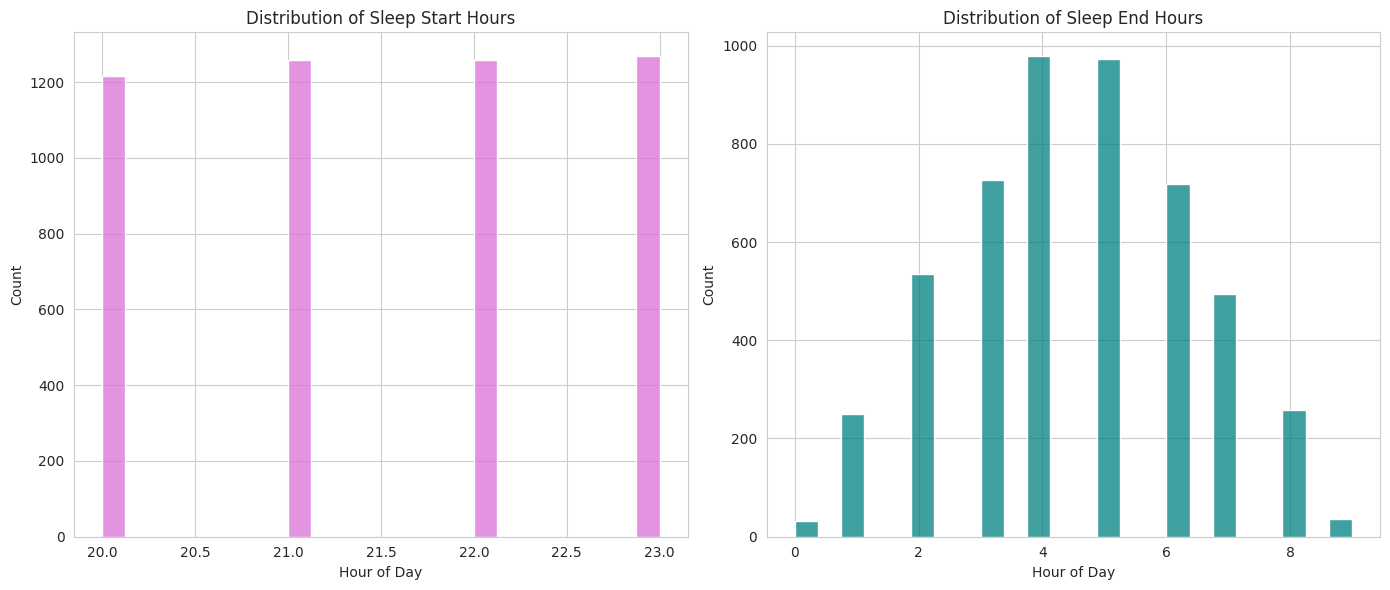

In [27]:
plt.figure(figsize=(14,6))

# Distribution of Sleep Start Hours
plt.subplot(1,2,1)
sns.histplot(df['Sleep Start'].dt.hour, bins=24, color='orchid', kde=False)
plt.title('Distribution of Sleep Start Hours')
plt.xlabel('Hour of Day')

# Distribution of Sleep End Hours
plt.subplot(1,2,2)
sns.histplot(df['Sleep End'].dt.hour, bins=24, color='teal', kde=False)
plt.title('Distribution of Sleep End Hours')
plt.xlabel('Hour of Day')

plt.tight_layout()
plt.show()

Deeper: Day-of-Week Analysis

<ipython-input-30-8e266dd95784>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DayOfWeek', y='Sleep Quality', palette='hsv', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])


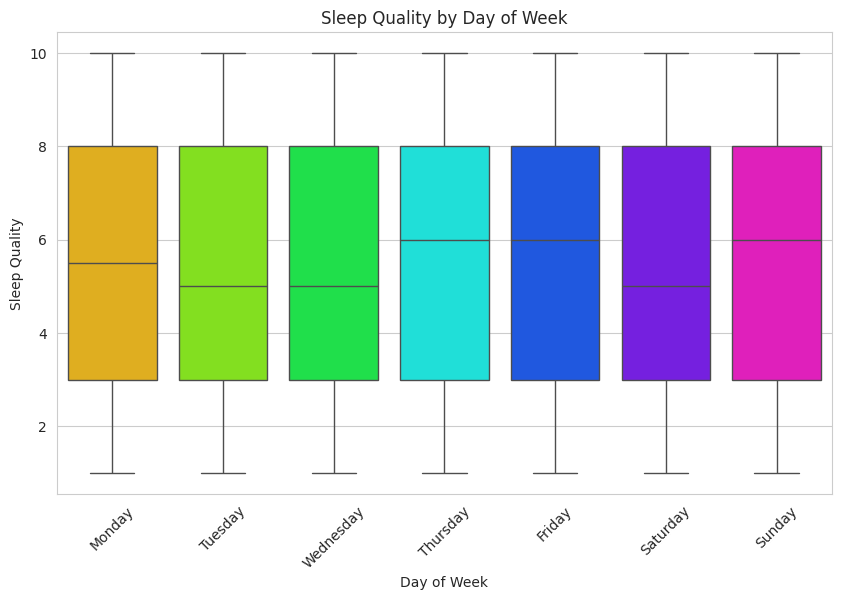

In [30]:
df['DayOfWeek'] = df['Date'].dt.day_name()

plt.figure(figsize=(10,6))
sns.boxplot(x='DayOfWeek', y='Sleep Quality', palette='hsv', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Sleep Quality by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Sleep Quality')
plt.xticks(rotation=45)
plt.show()

In [31]:
print("This notebook performed a comprehensive EDA on the Sleep Cycle & Productivity dataset.")
print("Key observations include:")
print("- Distributions of sleep hours and quality—revealing potential outliers (and maybe a few insomniacs).")
print("- Interesting trends in sleep quality across different age groups and genders.")
print("- Revealed relationships between exercise, caffeine intake, and sleep quality.")
print("- Mapped common sleep and wake times along with possible day-of-week effects.")

This notebook performed a comprehensive EDA on the Sleep Cycle & Productivity dataset.
Key observations include:
- Distributions of sleep hours and quality—revealing potential outliers (and maybe a few insomniacs).
- Interesting trends in sleep quality across different age groups and genders.
- Revealed relationships between exercise, caffeine intake, and sleep quality.
- Mapped common sleep and wake times along with possible day-of-week effects.
